## 📖 Background
You work for an international HR consultancy helping companies attract and retain top talent in the competitive tech industry. As part of your services, you provide clients with insights into industry salary trends to ensure they remain competitive in hiring and compensation practices.

Your team wants to use a data-driven approach to analyse how various factors—such as job role, experience level, remote work, and company size—impact salaries globally. By understanding these trends, you can advise clients on offering competitive packages to attract the best talent.

In this competition, you’ll explore and visualise salary data from thousands of employees worldwide. f you're tackling the advanced level, you'll go a step further—building predictive models to uncover key salary drivers and providing insights on how to enhance future data collection.

## 💾 The data

The data comes from a survey hosted by an HR consultancy, available in `'salaries.csv'`.

#### Each row represents a single employee's salary record for a given year:
- **`work_year`** - The year the salary was paid.  
- **`experience_level`** - Employee experience level:  
  - **`EN`**: Entry-level / Junior  
  - **`MI`**: Mid-level / Intermediate  
  - **`SE`**: Senior / Expert  
  - **`EX`**: Executive / Director  
- **`employment_type`** - Employment type:  
  - **`PT`**: Part-time  
  - **`FT`**: Full-time  
  - **`CT`**: Contract  
  - **`FL`**: Freelance  
- **`job_title`** - The job title during the year.  
- **`salary`** - Gross salary paid (in local currency).  
- **`salary_currency`** - Salary currency (ISO 4217 code).  
- **`salary_in_usd`** - Salary converted to USD using average yearly FX rate.  
- **`employee_residence`** - Employee's primary country of residence (ISO 3166 code).  
- **`remote_ratio`** - Percentage of remote work:  
  - **`0`**: No remote work (<20%)  
  - **`50`**: Hybrid (50%)  
  - **`100`**: Fully remote (>80%)  
- **`company_location`** - Employer's main office location (ISO 3166 code).  
- **`company_size`** - Company size:  
  - **`S`**: Small (<50 employees)  
  - **`M`**: Medium (50–250 employees)  
  - **`L`**: Large (>250 employees)  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

salaries = pd.read_csv('salaries.csv')
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Developer,168276,USD,168276,US,0,US,M
1,2024,MI,FT,Developer,112184,USD,112184,US,0,US,M
2,2024,EN,FT,Developer,180000,USD,180000,US,0,US,M
3,2024,EN,FT,Developer,133500,USD,133500,US,0,US,M
4,2024,EN,FT,Developer,122000,USD,122000,US,0,US,M


## Question 1:
Create a bar chart displaying the top 5 job titles with the highest average salary (in USD).

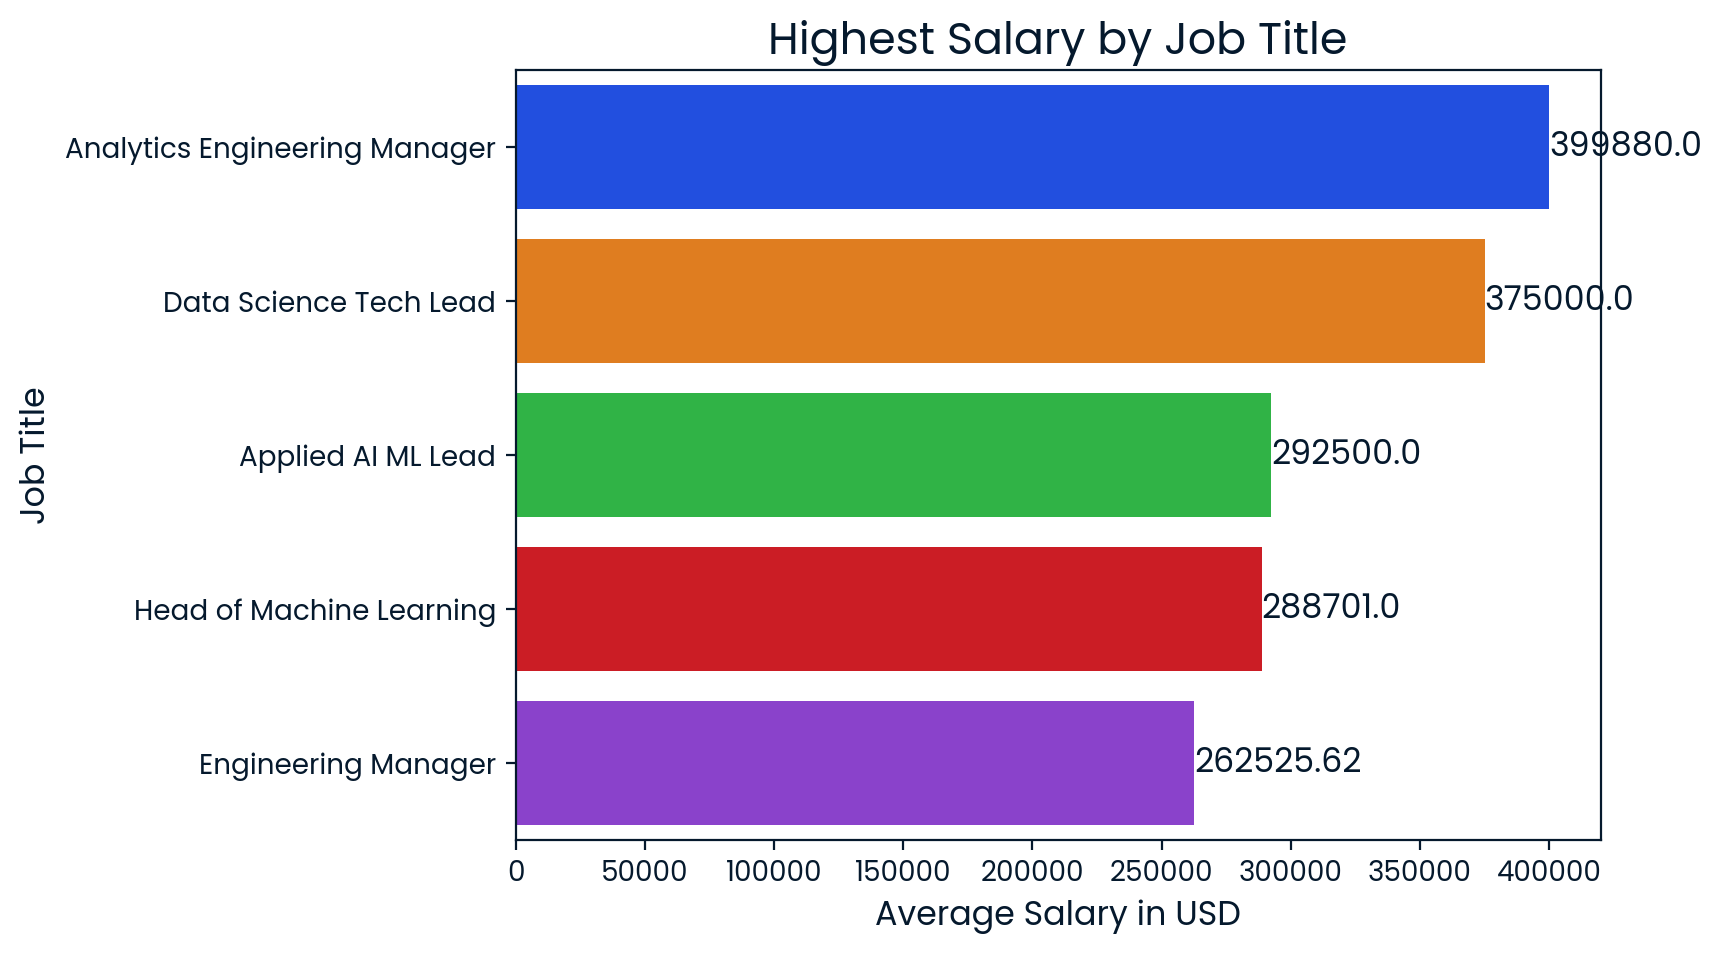

In [2]:
highest_salary = salaries.groupby('job_title')['salary_in_usd'].mean().round(2).sort_values(ascending=False).head(5)

plt.figure(figsize=(7, 5))
ax = sns.barplot(y=highest_salary.index, x=highest_salary.values, palette='bright')


for p in ax.patches: 
    ax.annotate(f'{p.get_width()}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=12)

plt.title('Highest Salary by Job Title', fontsize=16)
plt.ylabel('Job Title', fontsize=12)
plt.xlabel('Average Salary in USD', fontsize=12)

plt.show()

Analytics Engineering Manager earns most with almost 400,000 on average salary followed by positions such as 'Data Science Tech Lead', 'Applied AI ML Lead', 'Head of Machine Learning', 'Engineering Manager'.

## Question 2:
Compare the average salaries for employees working remotely 100%, 50%, and 0%. What patterns or trends do you observe?

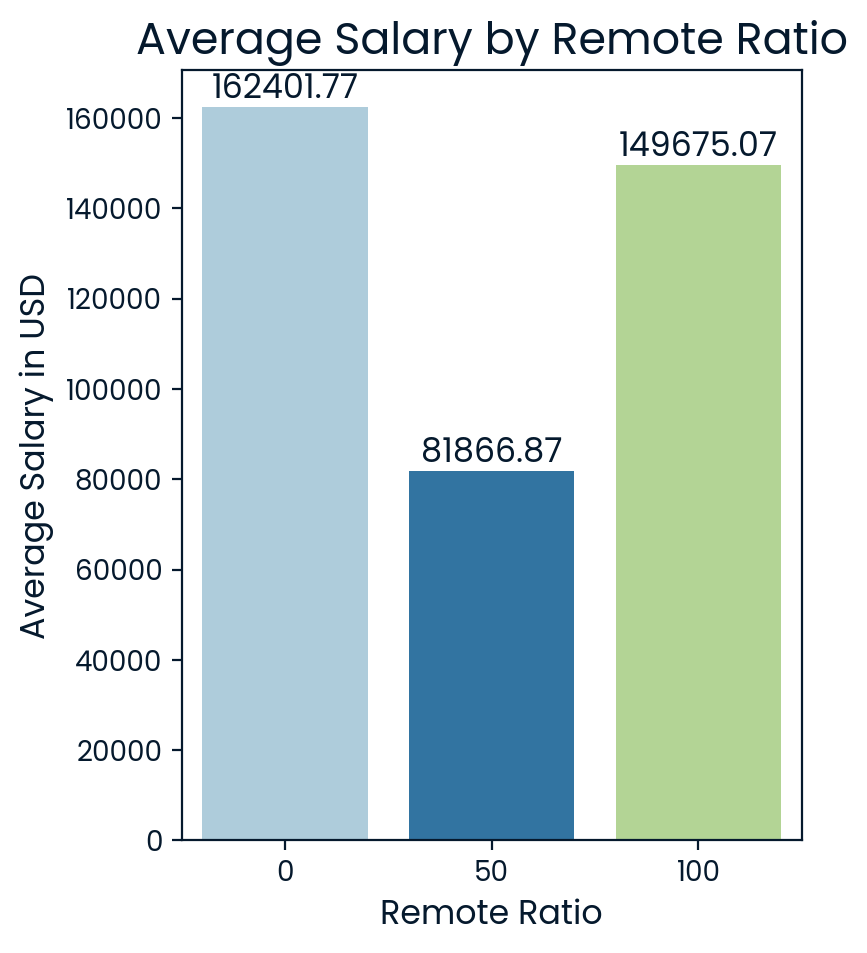

In [3]:
average_salary_by_remote_ratio = salaries.groupby('remote_ratio')['salary_in_usd'].mean().round(2)

plt.figure(figsize=(4, 5))
ax = sns.barplot(x=average_salary_by_remote_ratio.index, y=average_salary_by_remote_ratio.values, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom',fontsize=12)

plt.title('Average Salary by Remote Ratio', fontsize=16)
plt.xlabel('Remote Ratio', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.show()

Fully In person people earns most average salary while Hybrid(50% remote) earns the least among three.

## Question 3:
Visualise the salary distribution (in USD) across company sizes (S, M, L). Which company size offers the highest average salary?

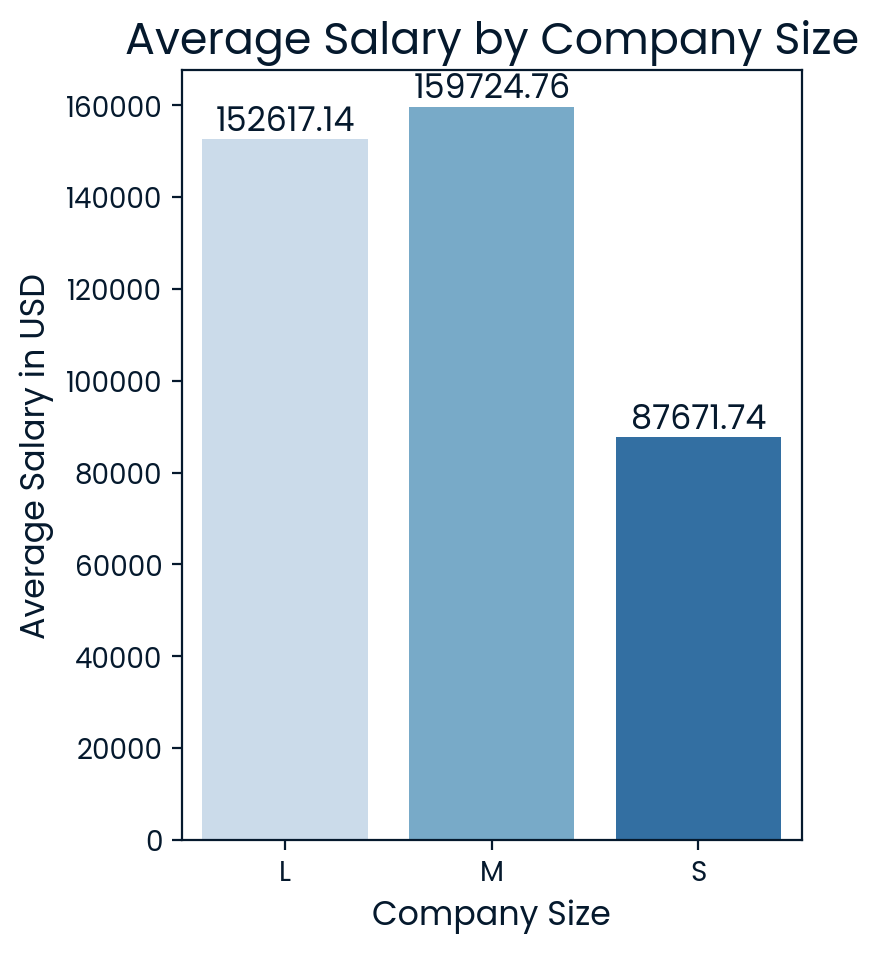

In [4]:
average_salary_by_size = salaries.groupby('company_size')['salary_in_usd'].mean().round(2)

plt.figure(figsize=(4, 5))
ax = sns.barplot(x=average_salary_by_size.index, y=average_salary_by_size.values, palette='Blues')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom',fontsize=12)

plt.title('Average Salary by Company Size', fontsize=16)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.show()

People working in Medium size companies earns more than the Large and small size companies.